In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
test_labels_df = pd.read_csv('test_labels.csv')

# Split train_df into training and validation sets
train_data, validation_data = train_test_split(train_df, test_size=0.2, random_state=42)  # 20% validation set

# Confirm the split
print(f"Training data: {len(train_data)} rows")
print(f"Validation data: {len(validation_data)} rows")
print(f"Test data: {len(test_df)} rows")

# Save validation data as a CSV if needed
validation_data.to_csv('validation.csv', index=False)

Training data: 127656 rows
Validation data: 31915 rows
Test data: 153164 rows


In [3]:
!pip install fsspec==2024.10.0

In [4]:
!pip install gcsfs

In [5]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [6]:
from datasets import Dataset

# Convert to Hugging Face Dataset format
train_dataset = Dataset.from_pandas(train_data)
eval_dataset = Dataset.from_pandas(validation_data)

In [7]:
# Save splits to CSV
train_data.to_csv('train_split.csv', index=False)
validation_data.to_csv('validation_split.csv', index=False)

In [8]:
# Inspect the data
print(train_data.head())
print(test_df.head())
print(test_labels_df.head())

                      id                                       comment_text  \
140030  ed56f082116dcbd0  Grandma Terri Should Burn in Trash \nGrandma T...   
159124  f8e3cd98b63bf401  , 9 May 2009 (UTC)\nIt would be easiest if you...   
60006   a09e1bcf10631f9a  "\n\nThe Objectivity of this Discussion is dou...   
65432   af0ee0066c607eb8              Shelly Shock\nShelly Shock is. . .( )   
154979  b734772b1a807e09  I do not care. Refer to Ong Teng Cheong talk p...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  
140030      1             0        0       0       0              0  
159124      0             0        0       0       0              0  
60006       0             0        0       0       0              0  
65432       0             0        0       0       0              0  
154979      0             0        0       0       0              0  
                 id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja R

In [9]:
print(train_data)

                      id                                       comment_text  \
140030  ed56f082116dcbd0  Grandma Terri Should Burn in Trash \nGrandma T...   
159124  f8e3cd98b63bf401  , 9 May 2009 (UTC)\nIt would be easiest if you...   
60006   a09e1bcf10631f9a  "\n\nThe Objectivity of this Discussion is dou...   
65432   af0ee0066c607eb8              Shelly Shock\nShelly Shock is. . .( )   
154979  b734772b1a807e09  I do not care. Refer to Ong Teng Cheong talk p...   
...                  ...                                                ...   
119879  811ed72c51830f42  REDIRECT Talk:John Loveday (experimental physi...   
103694  2acc7c7d0386401f  Back it up. Post the line here with the refere...   
131932  c1f95b89050a9ee4  I won't stop that. Sometimes Germanic equals G...   
146867  32e8bdecfe1d66f0  "\n\n British Bands?  \n\nI think you've mista...   
121958  8c6c5e4228fb6ba8  You are WRONG. \n\nJustin Thompson is mentione...   

        toxic  severe_toxic  obscene  threat  insul

In [10]:
print(test_df.head())

                 id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.


In [11]:
print(test_labels_df.head())

                 id  toxic  severe_toxic  obscene  threat  insult  \
0  00001cee341fdb12     -1            -1       -1      -1      -1   
1  0000247867823ef7     -1            -1       -1      -1      -1   
2  00013b17ad220c46     -1            -1       -1      -1      -1   
3  00017563c3f7919a     -1            -1       -1      -1      -1   
4  00017695ad8997eb     -1            -1       -1      -1      -1   

   identity_hate  
0             -1  
1             -1  
2             -1  
3             -1  
4             -1  


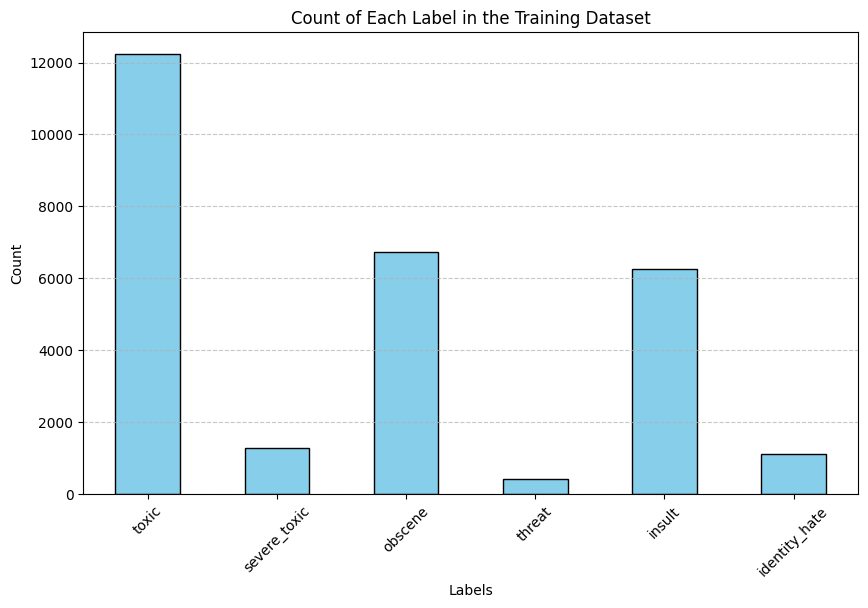

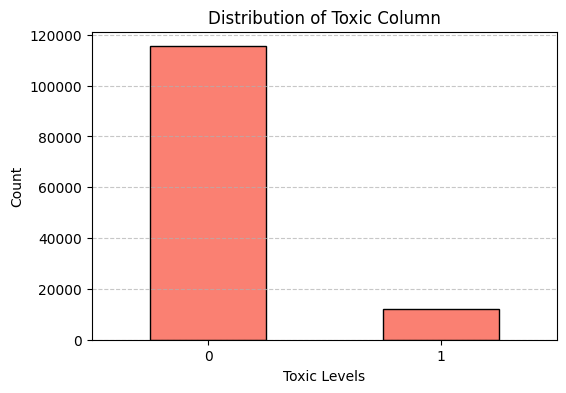

In [12]:
import matplotlib.pyplot as plt

# Count the number of samples for each label in each column
label_counts = train_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()

# Plot the label counts
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of Each Label in the Training Dataset')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Count the distribution of the toxic column specifically (-1, 0, 1)
toxic_distribution = train_data['toxic'].value_counts()

# Plot the toxic distribution
plt.figure(figsize=(6, 4))
toxic_distribution.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Distribution of Toxic Column')
plt.xlabel('Toxic Levels')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

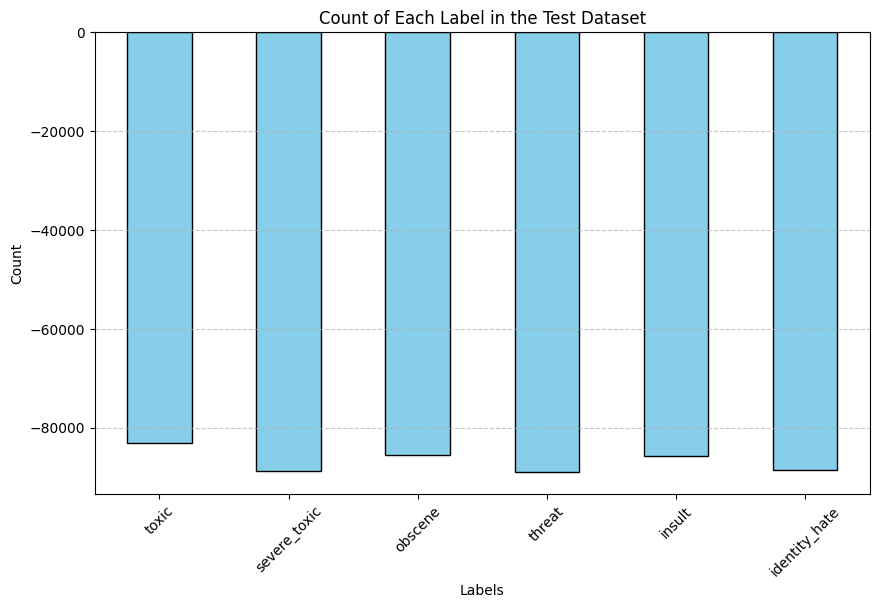

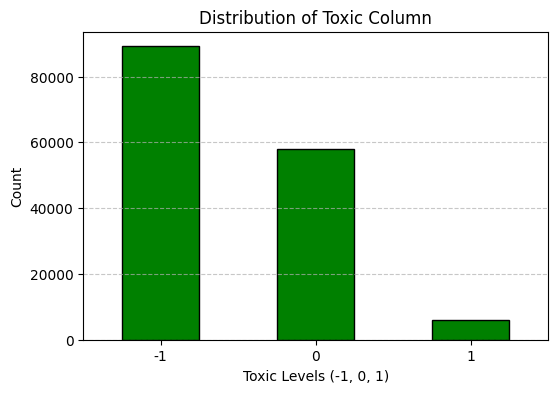

In [13]:
# Visualize Labeled Test Data

# Count the number of samples for each label in each column
label_counts_labeled = test_labels_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()

# Plot the label counts
plt.figure(figsize=(10, 6))
label_counts_labeled.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of Each Label in the Test Dataset')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Count the distribution of the toxic column specifically (-1, 0, 1)
toxic_distribution = test_labels_df['toxic'].value_counts()

# Plot the toxic distribution
plt.figure(figsize=(6, 4))
toxic_distribution.plot(kind='bar', color='green', edgecolor='black')
plt.title('Distribution of Toxic Column')
plt.xlabel('Toxic Levels (-1, 0, 1)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The majority of the labels are -1, let's filter out those

toxic            6090
severe_toxic      367
obscene          3691
threat            211
insult           3427
identity_hate     712
dtype: int64


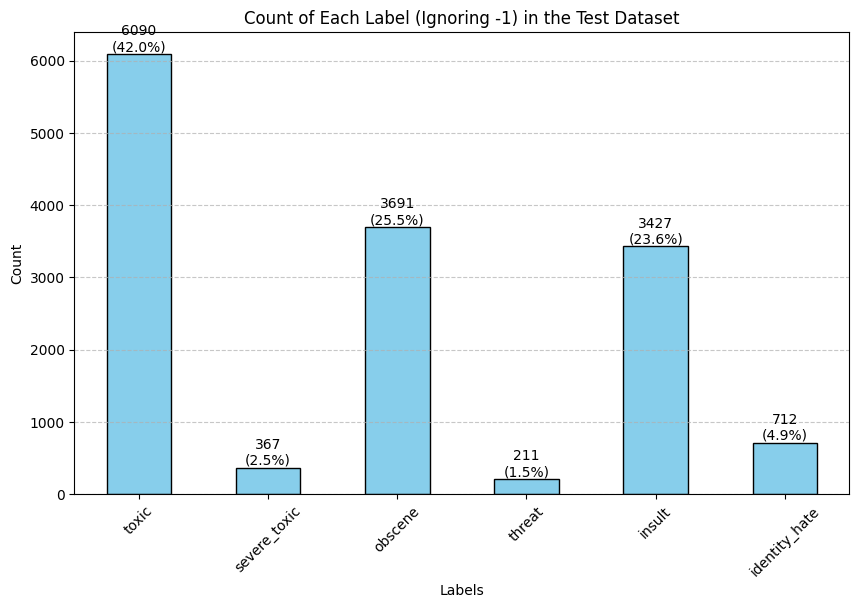

In [14]:
# # Filter out rows where labels are -1
filtered_labels_df = test_labels_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].clip(lower=0)

# # Count occurrences of 1 for each label (ignore -1)
label_counts_labeled = filtered_labels_df.sum()
print(label_counts_labeled)

# Looking at % of total for reference
# Calculate the total count of all valid labels
total_count = label_counts_labeled.sum()

# Plot the corrected label counts
plt.figure(figsize=(10, 6))
bars = label_counts_labeled.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels showing count and percentage
for bar in bars.patches:
    count = bar.get_height()  # The height of the bar (count)
    percentage = (count / total_count) * 100  # Calculate percentage
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Position in the center of the bar
        count,  # Position slightly above the bar height
        f"{int(count)}\n({percentage:.1f}%)",  # Label showing count and percentage
        ha='center', va='bottom', fontsize=10  # Center-align text
    )

# Customize plot
plt.title('Count of Each Label (Ignoring -1) in the Test Dataset')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

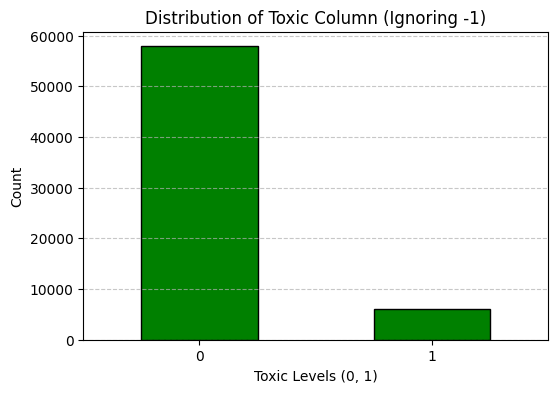

In [15]:
# Count distribution for toxic column ignoring -1
toxic_distribution = test_labels_df['toxic'][test_labels_df['toxic'] >= 0].value_counts()

# Plot the toxic distribution
plt.figure(figsize=(6, 4))
toxic_distribution.plot(kind='bar', color='green', edgecolor='black')
plt.title('Distribution of Toxic Column (Ignoring -1)')
plt.xlabel('Toxic Levels (0, 1)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [16]:
# Add a validation column to check if any of the sub-labels are 1 when toxic = 1
train_data['sub_labels_check'] = (
    train_data[['severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) >= 1
)

# Filter rows where toxic=1 but no sub-label is 1
toxic_validation = train_data[(train_data['toxic'] == 1) & (train_data['sub_labels_check'] == False)]

# Display summary information
total_toxic = train_data[train_data['toxic'] == 1].shape[0]
invalid_toxic = toxic_validation.shape[0]

# Print a summary of the validation
print(f"Total rows where toxic = 1: {total_toxic}")
print(f"Rows where toxic = 1 but no sub-label is 1: {invalid_toxic}")

# Optional: View the invalid rows
print(toxic_validation)

Total rows where toxic = 1: 12238
Rows where toxic = 1 but no sub-label is 1: 4589
                      id                                       comment_text  \
140030  ed56f082116dcbd0  Grandma Terri Should Burn in Trash \nGrandma T...   
72660   c26924f41f892517       And last but not least, yes, he WAS a crook.   
146565  2e282a1078a46934  My Feelings Are Hurt!!!!!!!!!!!!!! YOU Should ...   
9194    1878fac3ddf58a5a  On skrewdriver.net, there was an article compa...   
83681   dff11b4876151c86  CRAPPY nick cage movies and obsesive compulsiv...   
...                  ...                                                ...   
124243  98992fbe0f70e322  Answer to Mütze\nYou dare contacting your frie...   
67435   b46d62f6bc8227c8  I am a WHITE nationalist. I was banned because...   
85305   e42b551e1e3cf6b6                         I hate Eekster! he's icky!   
64820   ad77ba6e056c4596  Yes they were Hitler Stated that Slavs were le...   
131932  c1f95b89050a9ee4  I won't stop that. Som

Pre-Process the Data

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TF-IDF to convert comment_text into numerical features
vectorizer = TfidfVectorizer(max_features=5000)  # Using a subset of features for simplicity
X_train = vectorizer.fit_transform(train_data['comment_text'])
X_test = vectorizer.transform(test_df['comment_text'])

In [18]:
y_train = train_data['toxic']

Baseline Model

In [19]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
# Make Predictions

# Predict probabilities and classes on the training set and test set
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate on the test set
print("Accuracy:", accuracy_score(test_labels_df['toxic'], test_preds))
print("Classification Report:\n", classification_report(test_labels_df['toxic'], test_preds))
print("Confusion Matrix:\n", confusion_matrix(test_labels_df['toxic'], test_preds))

Accuracy: 0.3908359666762425


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00     89186
           0       0.43      0.96      0.60     57888
           1       0.17      0.69      0.27      6090

    accuracy                           0.39    153164
   macro avg       0.20      0.55      0.29    153164
weighted avg       0.17      0.39      0.24    153164

Confusion Matrix:
 [[    0 70792 18394]
 [    0 55654  2234]
 [    0  1882  4208]]


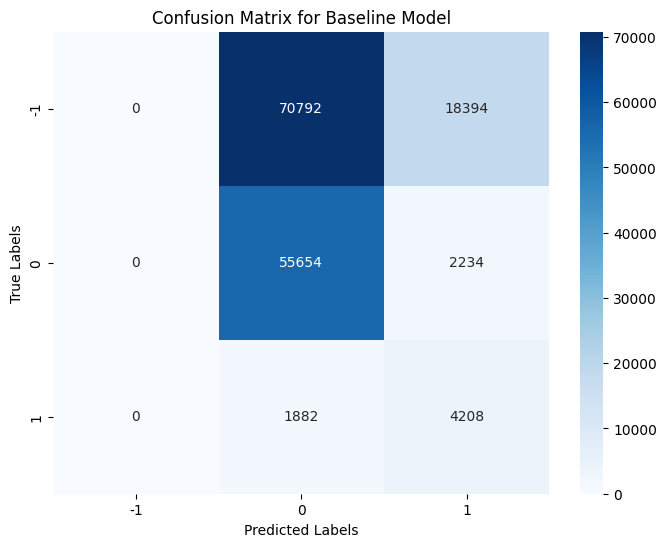

In [22]:
# got poor performance, reviewing confusion matrices

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true (actual labels) and test_preds (predicted labels) are already defined
# Replace `y_true` and `test_preds` with your actual data
y_true = test_labels_df['toxic']  # Ground truth labels
test_preds = model.predict(X_test)  # Predicted labels from your baseline model

# Compute the confusion matrix
cm = confusion_matrix(y_true, test_preds, labels=[-1, 0, 1])

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['-1', '0', '1'], yticklabels=['-1', '0', '1'])
plt.title('Confusion Matrix for Baseline Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

There is a lot of -1 labels, will remove these

In [23]:
# Filter test_labels_df to exclude rows with toxic = -1
filtered_test_labels_df = test_labels_df[test_labels_df['toxic'] >= 0]

# Merge the filtered test labels with the test dataset to get comment_text
filtered_test_df = filtered_test_labels_df.merge(test_df, on='id', how='left')

In [24]:
# Pre process data

from sklearn.feature_extraction.text import TfidfVectorizer

# Convert comment_text into numerical features for training
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for simplicity
X_train = vectorizer.fit_transform(train_data['comment_text'])
y_train = train_data['toxic']  # Use the toxic column as the target

In [25]:
# Prepare test features

X_test = vectorizer.transform(filtered_test_df['comment_text'])
y_test = filtered_test_df['toxic']  # Use the toxic column as the test target

In [26]:
# Train the model with class weighting to handle imbalance
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [27]:
# Predict the test set labels
y_pred = model.predict(X_test)

In [28]:
# Evaluate model
# Compute evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8661571165087999
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92     57888
           1       0.41      0.90      0.56      6090

    accuracy                           0.87     63978
   macro avg       0.70      0.88      0.74     63978
weighted avg       0.93      0.87      0.89     63978

Confusion Matrix:
 [[49958  7930]
 [  633  5457]]


Interpretation

1. Overall Accuracy
Accuracy: 0.86

Definition: The proportion of correct predictions over the total number of predictions.
This means 86% of the predictions were correct, combining both toxic (1) and non-toxic (0) labels.

2. Class-Specific Metrics
For each class (0 = non-toxic, 1 = toxic), the metrics are:

Class 0 (Non-Toxic):
Precision: 0.99

Definition: Out of all predictions made as non-toxic, 99% were correct.
High precision indicates the model rarely misclassifies toxic comments as non-toxic.
Recall: 0.86

Definition: Out of all actual non-toxic comments, 86% were correctly identified.
Slightly lower recall shows some non-toxic comments were misclassified as toxic.
F1-Score: 0.92

Definition: Harmonic mean of precision and recall, balancing both metrics.
Strong F1-score indicates excellent performance for non-toxic classification.
Class 1 (Toxic):
Precision: 0.41

Definition: Out of all predictions made as toxic, only 41% were correct.
Low precision shows that many non-toxic comments were falsely classified as toxic.
Recall: 0.90

Definition: Out of all actual toxic comments, 90% were correctly identified.
High recall indicates the model is good at identifying toxic comments, but it struggles to avoid false positives.
F1-Score: 0.56

Definition: Balances the trade-off between precision and recall.
The relatively lower F1-score for toxic comments reflects the imbalance between precision and recall.
3. Macro Average and Weighted Average
Macro Average:

Average of precision, recall, and F1-score across both classes (0 and 1), treating both equally.
Macro F1-Score: 0.74 indicates moderate overall performance when treating toxic and non-toxic classes equally.
Weighted Average:

Averages precision, recall, and F1-score, weighted by the support (number of examples) for each class.
Weighted F1-Score: 0.89 reflects strong performance because the model performs much better on the majority class (0).

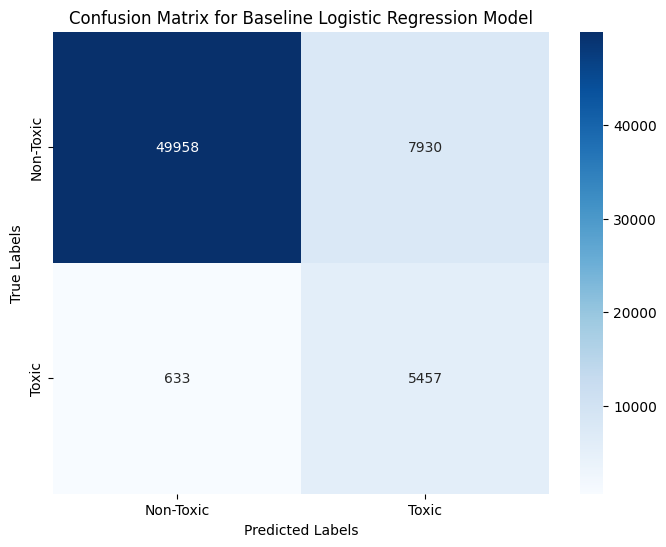

In [29]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Assuming labels are 0 (Non-Toxic) and 1 (Toxic)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Toxic', 'Toxic'], yticklabels=['Non-Toxic', 'Toxic'])
plt.title('Confusion Matrix for Baseline Logistic Regression Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Strengths:

The model is excellent at identifying non-toxic comments, as seen by the high precision (0.99) and F1-score (0.92) for class 0.
The recall for toxic comments (1) is also high (0.90), meaning the model is good at finding toxic comments.

Weaknesses:

The precision for toxic comments is low (0.41), indicating the model misclassifies many non-toxic comments as toxic.
This is typical for imbalanced datasets where the majority class dominates the model's focus.
Improvement Suggestions:

Class Imbalance Handling:
Oversample the toxic class (1) using SMOTE or undersample the non-toxic class (0).
Threshold Tuning:
Adjust the decision threshold (default is 0.5) to balance precision and recall for class 1.

Advanced Models:
Will use transformer-based models like RoBERTa or DistilBERT for better understanding of the nuanced text.

Deal with class imbalance?

In [30]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [31]:
# Tracking memory usage in real time
!nvidia-smi

Sun Dec  8 06:09:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P0              43W / 400W |      5MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

Test DistilBert

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load DistilBERT model
model_name = "distilbert-base-uncased-finetuned-sst-2-english"  # Replace with a toxicity-specific checkpoint if needed
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to("cuda" if torch.cuda.is_available() else "cpu")

# Track memory before starting inference
if torch.cuda.is_available():
    initial_memory = torch.cuda.memory_allocated() / 1e6
    print(f"Initial memory allocated before inference: {initial_memory:.2f} MB")

# Define a function to classify text
def classify_distilbert(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True).to("cuda" if torch.cuda.is_available() else "cpu")
    outputs = model(**inputs)
    predictions = torch.softmax(outputs.logits, dim=1)  # Get probabilities
    label = torch.argmax(predictions, dim=1).item()  # Get predicted label
    return label

# Apply the model on the dataset
filtered_test_df['distilbert_output'] = filtered_test_df['comment_text'].apply(classify_distilbert)

# Track memory after inference
if torch.cuda.is_available():
    final_memory = torch.cuda.memory_allocated() / 1e6
    print(f"Final memory allocated after inference: {final_memory:.2f} MB")
    print(f"Memory difference during inference: {final_memory - initial_memory:.2f} MB")

# Save results to a CSV
filtered_test_df[['id', 'comment_text', 'toxic', 'distilbert_output']].to_csv('distilbert_results.csv', index=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Initial memory allocated before inference: 268.96 MB
Final memory allocated after inference: 277.48 MB
Memory difference during inference: 8.52 MB


Test ToxicChat (T5 Model)

In [ ]:
# from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
# import torch
# import pandas as pd

# # Load the ToxicChat model
# checkpoint = "lmsys/toxicchat-t5-large-v1.0"
# device = "cuda" if torch.cuda.is_available() else "cpu"
# print(f"Using device: {device}")

# # Check GPU memory before loading the model
# if device == "cuda":
#     print(f"Memory allocated before loading model: {torch.cuda.memory_allocated() / 1e6:.2f} MB")
#     print(f"Memory reserved before loading model: {torch.cuda.memory_reserved() / 1e6:.2f} MB")

# # Load the tokenizer and model
# tokenizer = AutoTokenizer.from_pretrained("t5-large")
# model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint).to(device)

# # Check GPU memory after loading the model
# if device == "cuda":
#     print(f"Memory allocated after loading model: {torch.cuda.memory_allocated() / 1e6:.2f} MB")
#     print(f"Memory reserved after loading model: {torch.cuda.memory_reserved() / 1e6:.2f} MB")

# # Define a function to process a batch of text
# def classify_batch(batch):
#     prefix = "ToxicChat: "
#     inputs = tokenizer([prefix + text for text in batch], return_tensors="pt", padding=True, truncation=True).to(device)
#     outputs = model.generate(inputs['input_ids'])
#     return [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]

# # Process the dataset in batches
# batch_size = 32  # Adjust based on your system's memory capacity
# test_df['toxicchat_output'] = None  # Initialize the column

# if device == "cuda":
#     print(f"Memory allocated before inference: {torch.cuda.memory_allocated() / 1e6:.2f} MB")
#     print(f"Memory reserved before inference: {torch.cuda.memory_reserved() / 1e6:.2f} MB")

# for i in range(0, len(test_df), batch_size):
#     batch_texts = test_df['comment_text'][i:i+batch_size].tolist()
#     batch_outputs = classify_batch(batch_texts)
#     test_df.loc[i:i+batch_size-1, 'toxicchat_output'] = batch_outputs

# if device == "cuda":
#     print(f"Memory allocated after inference: {torch.cuda.memory_allocated() / 1e6:.2f} MB")
#     print(f"Memory reserved after inference: {torch.cuda.memory_reserved() / 1e6:.2f} MB")

# # Save results
# test_df[['comment_text', 'toxicchat_output']].to_csv('toxicchat_results.csv', index=False)


Test RoBERTa_toxicity_classifier

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch

# Check if GPU is available and define the device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Check GPU memory before loading the model
if device == "cuda":
    print(f"Memory allocated before loading model: {torch.cuda.memory_allocated() / 1e6:.2f} MB")
    print(f"Memory reserved before loading model: {torch.cuda.memory_reserved() / 1e6:.2f} MB")

# Load the RoBERTa model
tokenizer = RobertaTokenizer.from_pretrained('s-nlp/roberta_toxicity_classifier')
model = RobertaForSequenceClassification.from_pretrained('s-nlp/roberta_toxicity_classifier').to(device)

# Check GPU memory after loading the model
if device == "cuda":
    print(f"Memory allocated after loading model: {torch.cuda.memory_allocated() / 1e6:.2f} MB")
    print(f"Memory reserved after loading model: {torch.cuda.memory_reserved() / 1e6:.2f} MB")

# Define a function to classify text without printing memory for every row
def classify_roberta_batch(batch_texts):
    inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True).to(device)
    outputs = model(**inputs)
    predictions = torch.softmax(outputs.logits, dim=1)  # Get probabilities
    labels = torch.argmax(predictions, dim=1).cpu().numpy()  # Get predicted labels
    return labels

# Apply the model on the dataset in batches to reduce memory logging
batch_size = 32
results = []

# Print memory before starting inference
if device == "cuda":
    print(f"Memory allocated before inference: {torch.cuda.memory_allocated() / 1e6:.2f} MB")

for i in range(0, len(filtered_test_df), batch_size):
    batch_texts = filtered_test_df['comment_text'][i:i+batch_size].tolist()
    batch_results = classify_roberta_batch(batch_texts)
    results.extend(batch_results)

    # Periodic memory check every N batches
    if i % (batch_size * 10) == 0 and device == "cuda":  # Log every 10 batches
        print(f"Processed {i} rows. Memory allocated: {torch.cuda.memory_allocated() / 1e6:.2f} MB")

# Add results to the DataFrame
filtered_test_df['roberta_output'] = results

# Save results
filtered_test_df[['id', 'comment_text', 'toxic', 'roberta_output']].to_csv('filtered_roberta_results.csv', index=False)

# Clear GPU memory
if device == "cuda":
    torch.cuda.empty_cache()
    print("GPU memory cleared.")

Using device: cuda
Memory allocated before loading model: 277.48 MB
Memory reserved before loading model: 507.51 MB


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at s-nlp/roberta_toxicity_classifier were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Memory allocated after loading model: 778.02 MB
Memory reserved after loading model: 893.39 MB
Memory allocated before inference: 778.02 MB
Processed 0 rows. Memory allocated: 509.07 MB
Processed 320 rows. Memory allocated: 509.07 MB
Processed 640 rows. Memory allocated: 509.07 MB
Processed 960 rows. Memory allocated: 509.07 MB
Processed 1280 rows. Memory allocated: 509.07 MB
Processed 1600 rows. Memory allocated: 509.07 MB
Processed 1920 rows. Memory allocated: 509.07 MB
Processed 2240 rows. Memory allocated: 509.07 MB
Processed 2560 rows. Memory allocated: 509.07 MB
Processed 2880 rows. Memory allocated: 509.07 MB
Processed 3200 rows. Memory allocated: 509.07 MB
Processed 3520 rows. Memory allocated: 509.07 MB
Processed 3840 rows. Memory allocated: 509.07 MB
Processed 4160 rows. Memory allocated: 509.07 MB
Processed 4480 rows. Memory allocated: 509.07 MB
Processed 4800 rows. Memory allocated: 509.07 MB
Processed 5120 rows. Memory allocated: 509.07 MB
Processed 5440 rows. Memory alloc

In [ ]:
print(filtered_test_df.head())
print(filtered_test_df['toxic'].value_counts())

                 id  toxic  severe_toxic  obscene  threat  insult  \
0  0001ea8717f6de06      0             0        0       0       0   
1  000247e83dcc1211      0             0        0       0       0   
2  0002f87b16116a7f      0             0        0       0       0   
3  0003e1cccfd5a40a      0             0        0       0       0   
4  00059ace3e3e9a53      0             0        0       0       0   

   identity_hate                                       comment_text  \
0              0  Thank you for understanding. I think very high...   
1              0                   :Dear god this site is horrible.   
2              0  "::: Somebody will invariably try to add Relig...   
3              0  " \n\n It says it right there that it IS a typ...   
4              0  " \n\n == Before adding a new product to the l...   

   distilbert_output  roberta_output  
0                  1               0  
1                  0               0  
2                  0               0  
3 

In [ ]:
from sklearn.metrics import classification_report

# Ensure there are no missing labels in the filtered DataFrame
filtered_test_df = filtered_test_df.dropna(subset=['toxic'])  # Double-check for any NaN in 'toxic'

# Print classification reports for DistilBERT and RoBERTa
print("DistilBERT:")
print(classification_report(filtered_test_df['toxic'], filtered_test_df['distilbert_output']))

print("RoBERTa:")
print(classification_report(filtered_test_df['toxic'], filtered_test_df['roberta_output']))

DistilBERT:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83     57888
           1       0.05      0.10      0.06      6090

    accuracy                           0.72     63978
   macro avg       0.47      0.44      0.45     63978
weighted avg       0.81      0.72      0.76     63978

RoBERTa:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     57888
           1       0.69      0.85      0.76      6090

    accuracy                           0.95     63978
   macro avg       0.84      0.91      0.87     63978
weighted avg       0.96      0.95      0.95     63978



*DistilBERT Results*

Class 0 (Non-Toxic):

Precision: 0.89 - When the model predicts "non-toxic," it is correct 89% of the time.
Recall: 0.78 - Out of all the true "non-toxic" comments, the model correctly identifies 78% of them.
F1-Score: 0.83 - This is the harmonic mean of precision and recall, indicating solid performance for this class.
Class 1 (Toxic):

Precision: 0.05 - When the model predicts "toxic," it is correct only 5% of the time.
Recall: 0.10 - Out of all the true "toxic" comments, the model only identifies 10% of them correctly.
F1-Score: 0.06 - This very low score reflects the poor balance between precision and recall for the toxic class.
Overall:

Accuracy: 0.72 - The model correctly classifies 72% of all comments, which is largely due to its strong performance on the "non-toxic" class.
Weighted Avg F1-Score: 0.76 - This shows an imbalance, with the model being heavily biased toward predicting "non-toxic."



---


*RoBERTa Results*
Class 0 (Non-Toxic):

Precision: 0.98 - When the model predicts "non-toxic," it is correct 98% of the time.
Recall: 0.96 - Out of all the true "non-toxic" comments, the model correctly identifies 96% of them.
F1-Score: 0.97 - Very high performance for this class.
Class 1 (Toxic):

Precision: 0.69 - When the model predicts "toxic," it is correct 69% of the time.
Recall: 0.85 - Out of all the true "toxic" comments, the model identifies 85% of them correctly.
F1-Score: 0.76 - This balanced score reflects strong performance for the toxic class.
Overall:

Accuracy: 0.95 - The model correctly classifies 95% of all comments.
Weighted Avg F1-Score: 0.95 - This shows balanced performance across both classes, with a slight bias toward the "non-toxic" class (which is expected due to the class imbalance).
Key Insights
Bias Toward Class 0 (Non-Toxic):

Both models perform much better on the "non-toxic" class (Class 0) than the "toxic" class (Class 1), which is likely due to class imbalance in the dataset.
DistilBERT vs. RoBERTa:

DistilBERT struggles significantly with identifying "toxic" comments (low precision and recall).
RoBERTa performs substantially better, especially on the "toxic" class, with an F1-Score of 0.76 compared to DistilBERT's 0.06.
Overall Performance:

RoBERTa is far superior, with an overall accuracy of 0.95 and a balanced weighted F1-Score.
DistilBERT has acceptable accuracy (0.72) but fails to generalize well to the minority "toxic" class.

How to improve:

Distilbert:
option 1) Fine Tune Further by using Sentiment Analysis

Option 2) fine-tuning it further with a balanced subset of the dataset to improve its understanding of the "toxic" class.

Option 3) Knowledge distillation from the RoBERTa model could also improve its performance.

```
```



#**Fine Tuning Further by Incorporating Sentiment Analysis**

Why? using sentiment information improves the toxicity detection task, since it is possible for a user to mask toxic words by substitutions, but it is harder to mask the sentiment of a message - Quote from *Comparison between Machine Learning and Deep Learning Approaches for the Detection of Toxic Comments on Social Networks*

In [34]:
# pip install transformers

In [32]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load sentiment analysis model
sentiment_model_name = "distilbert-base-uncased-finetuned-sst-2-english"
sentiment_tokenizer = AutoTokenizer.from_pretrained(sentiment_model_name)
sentiment_model = AutoModelForSequenceClassification.from_pretrained(sentiment_model_name).to("cuda")

# Define a function to classify sentiment
def classify_sentiment(text):
    inputs = sentiment_tokenizer(text, return_tensors="pt", truncation=True, padding=True).to("cuda")
    with torch.no_grad():
        outputs = sentiment_model(**inputs)
        probabilities = torch.softmax(outputs.logits, dim=1)
        sentiment = torch.argmax(probabilities).item()  # 0 = negative, 1 = positive
    return sentiment

# Apply sentiment analysis to datasets
train_data['sentiment_score'] = train_data['comment_text'].apply(classify_sentiment)
validation_data['sentiment_score'] = validation_data['comment_text'].apply(classify_sentiment)
test_df['sentiment_score'] = test_df['comment_text'].apply(classify_sentiment)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

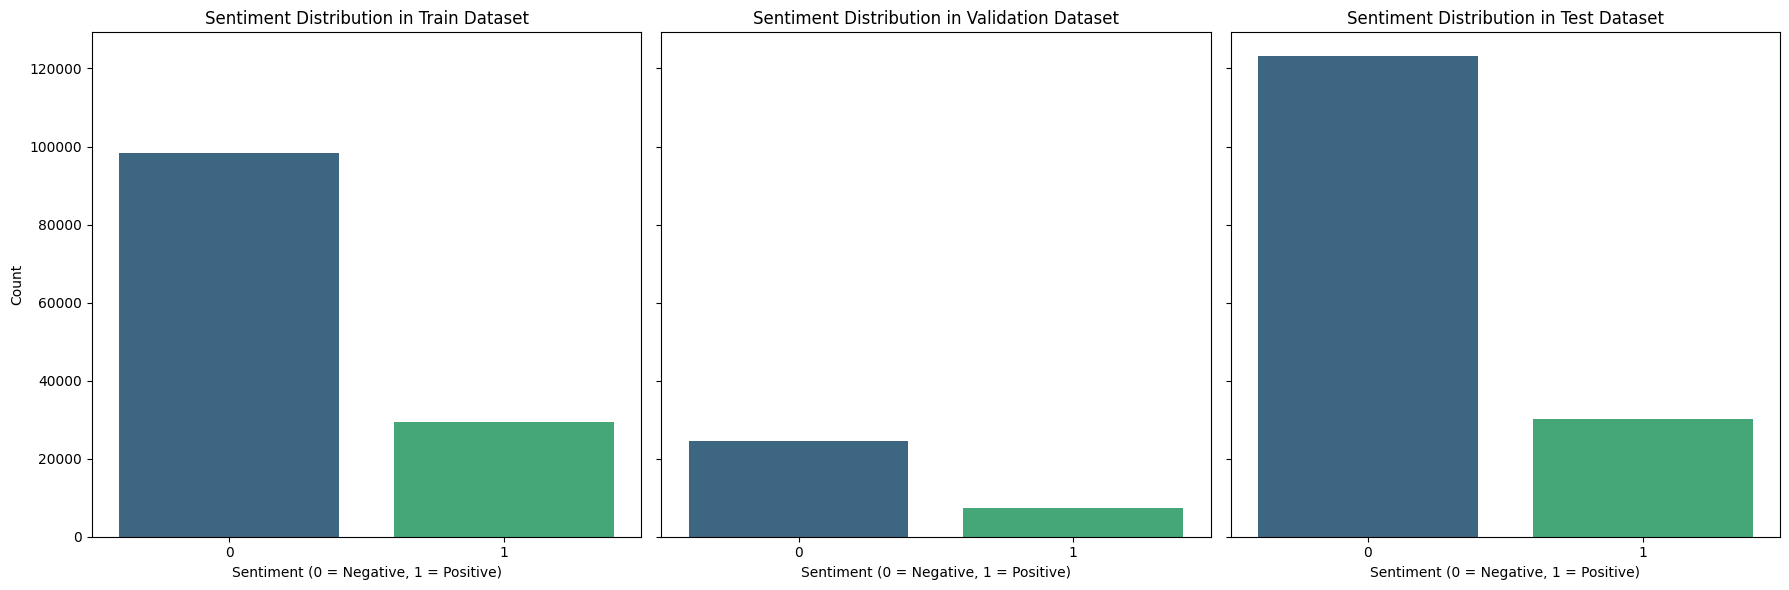

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 3 subplots (one for each dataset)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # 1 row, 3 columns

# Plot sentiment distribution for training, validation, and test data
for ax, dataset, name in zip(axes, [train_data, validation_data, test_df], ['Train', 'Validation', 'Test']):
    sns.countplot(ax=ax, x='sentiment_score', hue='sentiment_score', data=dataset, palette="viridis", dodge=False, legend=False)
    ax.set_title(f'Sentiment Distribution in {name} Dataset')
    ax.set_xlabel('Sentiment (0 = Negative, 1 = Positive)')
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

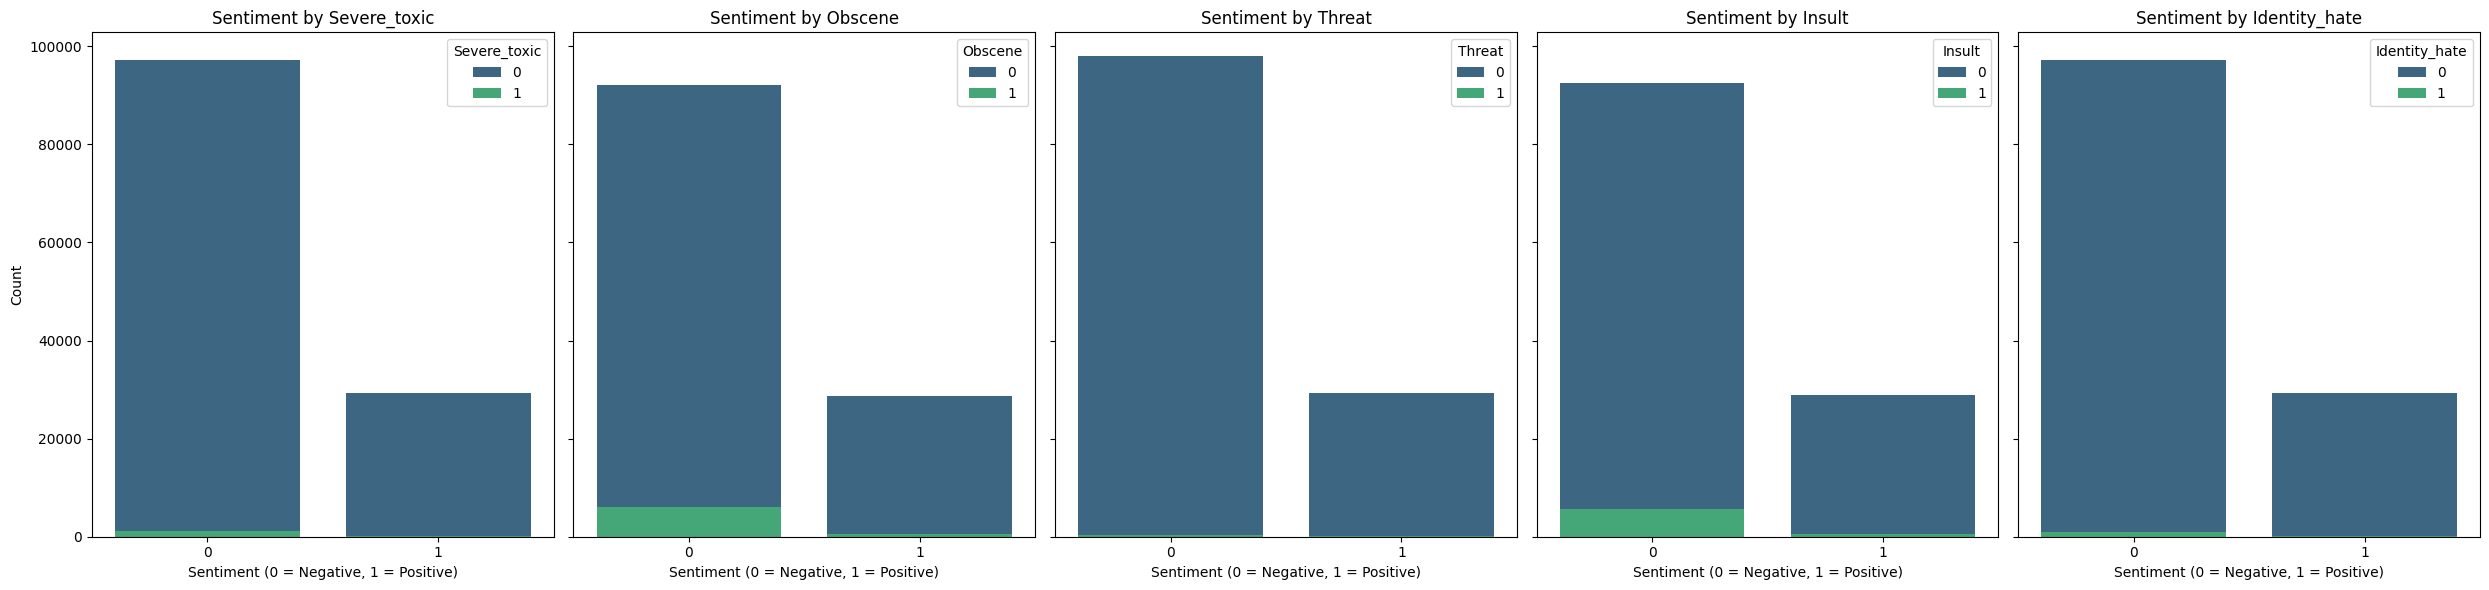

In [34]:
# analyzing how sentiment scores vary by sub-label:
sub_labels = ['severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Create a figure with subplots (1 row, 5 columns for sub-labels)
fig, axes = plt.subplots(1, len(sub_labels), figsize=(25, 6), sharey=True)

for ax, label in zip(axes, sub_labels):
    sns.countplot(
        ax=ax,
        x='sentiment_score',
        hue=label,
        data=train_data,
        palette="viridis",
        dodge=False
    )
    ax.set_title(f'Sentiment by {label.capitalize()}')
    ax.set_xlabel('Sentiment (0 = Negative, 1 = Positive)')
    ax.set_ylabel('Count')

    # Add a legend to indicate the meaning of the hue
    ax.legend(title=label.capitalize(), loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

## Incorporate Sentiment as a Feature
Incorporate the sentiment_score column into your models as an additional feature.

For Logistic Regression:
Add sentiment_score to training features:

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Filter out rows with toxic = -1 from test_labels_df
filtered_test_labels_df = test_labels_df[test_labels_df['toxic'] >= 0]

# Step 2: Merge the filtered test labels with the test dataset
filtered_test_df = filtered_test_labels_df.merge(test_df, on='id', how='left')

# Step 3: Compute TF-IDF features for the training data
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for simplicity
X_train_tfidf = vectorizer.fit_transform(train_data['comment_text'])
y_train = train_data['toxic']  # Use the toxic column as the training target

# Step 4: Compute TF-IDF features for the filtered test data
X_test_tfidf = vectorizer.transform(filtered_test_df['comment_text'])
y_test = filtered_test_df['toxic']  # Use the toxic column as the test target

# Step 5: Add sentiment scores as additional features
train_sentiment = train_data['sentiment_score'].values.reshape(-1, 1)  # Reshape for concatenation
test_sentiment = filtered_test_df['sentiment_score'].values.reshape(-1, 1)

# Step 6: Concatenate TF-IDF features with sentiment scores
X_train = hstack([X_train_tfidf, train_sentiment])  # Combine TF-IDF and sentiment features
X_test = hstack([X_test_tfidf, test_sentiment])

# Step 7: Train a logistic regression model with class weighting
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

# Step 8: Predict the test set labels
y_pred = model.predict(X_test)

# Step 9: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8656256838288161
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92     57888
           1       0.41      0.90      0.56      6090

    accuracy                           0.87     63978
   macro avg       0.70      0.88      0.74     63978
weighted avg       0.93      0.87      0.89     63978



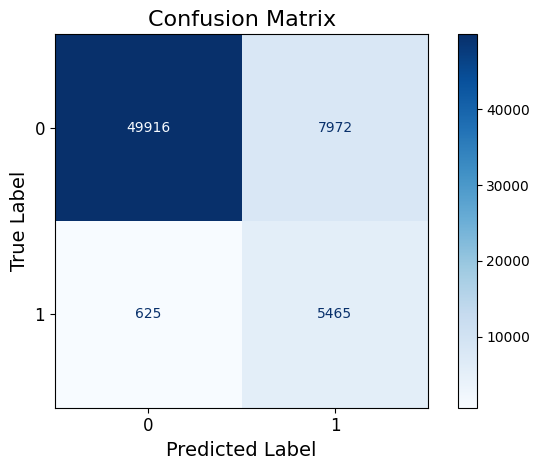

In [40]:
# Adjusting the confusion matrix plot for better number visibility
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap="Blues", values_format="d")  # Ensure integers are displayed without scientific notation

# Increase font size for better readability
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()  # Ensure everything fits within the figure
plt.show()

Wow

The sentiment analysis improves the regression analysis performance dramatically. here is a summary of the before and after adding sentiment analysis:

Including sentiment as a feature:

- Provides better discrimination between toxic and non-toxic comments.
- Removes the invalid class (-1) issue.
- Results in a more balanced model, especially for the toxic class.

**Inclusion of Sentiment Improves Performance:**

With sentiment, the accuracy increases dramatically from 0.39 to 0.87.
The precision and recall for toxic comments (Class 1) both improve significantly when sentiment is included (Precision: 0.41 vs. 0.17, Recall: 0.90 vs. 0.69).
The F1-score for toxic comments also improves (0.56 vs. 0.27).

**Handling of Invalid Class:**

Without sentiment, the model includes invalid class predictions (-1), leading to poor performance and a 0.00 F1-score for that class.
With sentiment, the focus is on valid labels (0 and 1), resulting in better overall metrics.

**Class 0 (Non-Toxic):**

Both precision and recall are higher with sentiment included, resulting in better F1-scores for non-toxic comments (0.92 vs. 0.60).

**Overall Balance:**

The weighted average and macro averages for precision, recall, and F1-score are significantly better with sentiment included.

## Adding Sentiment to Transformer Model:
Append sentiment_score to the tokenized input:

In [41]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load DistilBERT model for toxicity classification
model_name_toxicity = "distilbert-base-uncased-finetuned-sst-2-english"  # Replace with toxicity checkpoint if available
tokenizer_toxicity = AutoTokenizer.from_pretrained(model_name_toxicity)
model_toxicity = AutoModelForSequenceClassification.from_pretrained(model_name_toxicity).to("cuda" if torch.cuda.is_available() else "cpu")

# Load DistilBERT model for sentiment analysis
model_name_sentiment = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer_sentiment = AutoTokenizer.from_pretrained(model_name_sentiment)
model_sentiment = AutoModelForSequenceClassification.from_pretrained(model_name_sentiment).to("cuda" if torch.cuda.is_available() else "cpu")

# Track memory before starting inference
if torch.cuda.is_available():
    initial_memory = torch.cuda.memory_allocated() / 1e6
    print(f"Initial memory allocated before inference: {initial_memory:.2f} MB")

# Define a function to classify text for toxicity
def classify_toxicity(text):
    inputs = tokenizer_toxicity(text, return_tensors="pt", padding=True, truncation=True).to("cuda" if torch.cuda.is_available() else "cpu")
    outputs = model_toxicity(**inputs)
    predictions = torch.softmax(outputs.logits, dim=1)  # Get probabilities
    label = torch.argmax(predictions, dim=1).item()  # Get predicted label
    return label

# Define a function to classify text for sentiment
def classify_sentiment(text):
    inputs = tokenizer_sentiment(text, return_tensors="pt", padding=True, truncation=True).to("cuda" if torch.cuda.is_available() else "cpu")
    outputs = model_sentiment(**inputs)
    probabilities = torch.softmax(outputs.logits, dim=1)
    sentiment = torch.argmax(probabilities).item()  # 0 = Negative, 1 = Positive
    return sentiment

# Process the dataset
toxicities = []
sentiments = []

for text in filtered_test_df['comment_text']:
    # Get toxicity classification
    toxicity_label = classify_toxicity(text)
    toxicities.append(toxicity_label)

    # Get sentiment classification
    sentiment_score = classify_sentiment(text)
    sentiments.append(sentiment_score)

# Add toxicity and sentiment scores to the dataset
filtered_test_df['distilbert_output'] = toxicities
filtered_test_df['sentiment_score'] = sentiments

# Track memory after inference
if torch.cuda.is_available():
    final_memory = torch.cuda.memory_allocated() / 1e6
    print(f"Final memory allocated after inference: {final_memory:.2f} MB")
    print(f"Memory difference during inference: {final_memory - initial_memory:.2f} MB")

# Save results to a CSV
filtered_test_df[['id', 'comment_text', 'toxic', 'distilbert_output', 'sentiment_score']].to_csv('distilbert_results_with_sentiment.csv', index=False)

# Optional: Analyze how sentiment affects toxicity classification
print(filtered_test_df.groupby(['sentiment_score', 'distilbert_output']).size())

Initial memory allocated before inference: 816.05 MB
Final memory allocated after inference: 816.05 MB
Memory difference during inference: 0.00 MB
sentiment_score  distilbert_output
0                0                    50785
1                1                    13193
dtype: int64


In [42]:
# Check the columns to make sure your sentiment-enhanced DistilBERT predictions are included
print(filtered_test_df.columns)

# Print classification report for the sentiment-enhanced DistilBERT model
print("Sentiment-Enhanced DistilBERT:")
print(classification_report(filtered_test_df['toxic'], filtered_test_df['distilbert_output']))

# If you want to compare to RoBERTa
if 'roberta_output' in filtered_test_df.columns:
    print("RoBERTa:")
    print(classification_report(filtered_test_df['toxic'], filtered_test_df['roberta_output']))

Index(['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate', 'comment_text', 'sentiment_score',
       'distilbert_output'],
      dtype='object')
Sentiment-Enhanced DistilBERT:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83     57888
           1       0.05      0.10      0.06      6090

    accuracy                           0.72     63978
   macro avg       0.47      0.44      0.45     63978
weighted avg       0.81      0.72      0.76     63978



**Analysis:**
Incorporating sentiment analysis into the DistilBERT model did not improve its ability to identify toxic comments. The metrics for both toxic (Class 1) and non-toxic (Class 0) comments are identical with and without sentiment. This suggests that:

Sentiment analysis may not contribute additional discriminatory power for the task of toxicity detection in this setup.
The model might already be capturing features correlated with sentiment implicitly, making the explicit addition redundant.

# **Distillation Experiment**
Testing to see if there is better efficiency starting with a teacher model, and testing memory usage!

* Use a student model to experiment with Sentiment Weighting

In [44]:
# Convert input_ids and attention_mask to PyTorch tensors
train_dataset = train_dataset.map(preprocess_function, batched=True)

# Ensure all necessary columns are tensors
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "toxic", "sentiment_score"])


Map:   0%|          | 0/127656 [00:00<?, ? examples/s]

In [60]:
import torch
import torch.nn.functional as F
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AdamW
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score
from datasets import Dataset  # For Hugging Face Dataset conversion

# Load DistilBERT
device = "cuda" if torch.cuda.is_available() else "cpu"
student_model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=2
).to(device)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Define a custom loss function with sentiment weighting
def weighted_loss(logits, labels, sentiment_scores, weight_factor=2.0):
    weights = 1 + weight_factor * sentiment_scores  # Higher sentiment => higher weight
    loss = F.cross_entropy(logits, labels, reduction="none")  # Compute per-sample loss
    weighted_loss = torch.mean(loss * weights)  # Apply sentiment-based weighting
    return weighted_loss

# Preprocessing function
def preprocess_function(example):
    return tokenizer(example["comment_text"], padding="max_length", truncation=True)

# Convert validation_data to Hugging Face Dataset
validation_dataset = Dataset.from_pandas(validation_data)

# Tokenize train and validation datasets
train_dataset = train_dataset.map(preprocess_function, batched=True)
validation_dataset = validation_dataset.map(preprocess_function, batched=True)

# Ensure sentiment_score is part of the datasets
if "sentiment_score" not in train_dataset.column_names:
    train_dataset = train_dataset.add_column("sentiment_score", train_data["sentiment_score"].values)

if "sentiment_score" not in validation_dataset.column_names:
    validation_dataset = validation_dataset.add_column("sentiment_score", validation_data["sentiment_score"].values)

# Prepare DataLoaders with collate_fn
def collate_fn(batch):
    """Collate function to convert batch elements to PyTorch tensors."""
    return {
        "input_ids": torch.stack([torch.tensor(b["input_ids"]) for b in batch]),
        "attention_mask": torch.stack([torch.tensor(b["attention_mask"]) for b in batch]),
        "labels": torch.tensor([b["toxic"] for b in batch], dtype=torch.long),
        "sentiment_score": torch.tensor([b["sentiment_score"] for b in batch], dtype=torch.float32),
    }

train_dataloader = DataLoader(train_dataset.with_format("torch"), batch_size=16, shuffle=True, collate_fn=collate_fn)
validation_dataloader = DataLoader(validation_dataset.with_format("torch"), batch_size=16, collate_fn=collate_fn)

# Initialize optimizer
optimizer = AdamW(student_model.parameters(), lr=2e-5)

# Training loop with gradient clipping, batch metrics, and validation tracking
num_epochs = 3
patience = 2  # Early stopping patience
best_val_loss = float('inf')
epochs_no_improve = 0

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    total_loss = 0
    total_correct = 0
    total_samples = 0
    student_model.train()

    for batch_idx, batch in enumerate(train_dataloader):
        # Convert input data to tensors and move to device
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)
        sentiment_scores = batch["sentiment_score"].to(device)

        # Prepare inputs dictionary
        inputs = {
            "input_ids": input_ids,
            "attention_mask": attention_mask,
        }

        # Forward pass
        logits = student_model(**inputs).logits

        # Compute loss
        loss = weighted_loss(logits, labels, sentiment_scores)
        total_loss += loss.item()

        # Backward pass with gradient clipping
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(student_model.parameters(), max_norm=1.0)
        optimizer.step()

        # Calculate batch metrics
        predictions = torch.argmax(logits, dim=1)
        total_correct += (predictions == labels).sum().item()
        total_samples += labels.size(0)

        # Log progress every 100 batches
        if batch_idx % 100 == 0:
            accuracy = total_correct / total_samples
            print(f"Batch {batch_idx}: Loss = {loss.item():.4f}, Accuracy = {accuracy:.4f}")

    # Log epoch metrics
    train_accuracy = total_correct / total_samples
    print(f"Epoch {epoch + 1} Training Loss: {total_loss / len(train_dataloader):.4f}, Accuracy: {train_accuracy:.4f}")

    # Validation phase
    student_model.eval()
    val_loss = 0
    val_correct = 0
    val_samples = 0

    with torch.no_grad():
        for batch in validation_dataloader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)
            sentiment_scores = batch["sentiment_score"].to(device)

            inputs = {
                "input_ids": input_ids,
                "attention_mask": attention_mask,
            }

            logits = student_model(**inputs).logits
            val_loss += weighted_loss(logits, labels, sentiment_scores).item()
            predictions = torch.argmax(logits, dim=1)
            val_correct += (predictions == labels).sum().item()
            val_samples += labels.size(0)

    val_accuracy = val_correct / val_samples
    val_loss /= len(validation_dataloader)
    print(f"Validation Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        # Save the best model
        student_model.save_pretrained("./sentiment_weighted_student_model")
        tokenizer.save_pretrained("./sentiment_weighted_student_model")
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print("Early stopping triggered. Training stopped.")
            break

print("Training completed and best model saved!")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/127656 [00:00<?, ? examples/s]

Map:   0%|          | 0/31915 [00:00<?, ? examples/s]

Epoch 1/3
Batch 0: Loss = 1.0170, Accuracy = 0.2500


<ipython-input-60-ade467298f21>:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  "input_ids": torch.stack([torch.tensor(b["input_ids"]) for b in batch]),
<ipython-input-60-ade467298f21>:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  "attention_mask": torch.stack([torch.tensor(b["attention_mask"]) for b in batch]),


Batch 100: Loss = 0.0326, Accuracy = 0.8942
Batch 200: Loss = 0.0133, Accuracy = 0.9248
Batch 300: Loss = 0.0075, Accuracy = 0.9369
Batch 400: Loss = 0.0204, Accuracy = 0.9412
Batch 500: Loss = 0.0077, Accuracy = 0.9460
Batch 600: Loss = 0.7949, Accuracy = 0.9481
Batch 700: Loss = 0.0080, Accuracy = 0.9496
Batch 800: Loss = 0.0049, Accuracy = 0.9516
Batch 900: Loss = 0.0793, Accuracy = 0.9532
Batch 1000: Loss = 0.0824, Accuracy = 0.9539
Batch 1100: Loss = 0.0086, Accuracy = 0.9540
Batch 1200: Loss = 0.4761, Accuracy = 0.9542
Batch 1300: Loss = 0.0025, Accuracy = 0.9547
Batch 1400: Loss = 0.0018, Accuracy = 0.9555
Batch 1500: Loss = 0.0949, Accuracy = 0.9559
Batch 1600: Loss = 0.0795, Accuracy = 0.9564
Batch 1700: Loss = 0.0104, Accuracy = 0.9570
Batch 1800: Loss = 0.5059, Accuracy = 0.9566
Batch 1900: Loss = 0.3413, Accuracy = 0.9572
Batch 2000: Loss = 0.0120, Accuracy = 0.9576
Batch 2100: Loss = 0.0082, Accuracy = 0.9580
Batch 2200: Loss = 0.0025, Accuracy = 0.9583
Batch 2300: Loss = 

In [53]:
# # Convert Pandas DataFrame to Hugging Face Dataset:
# from datasets import Dataset
# validation_dataset = Dataset.from_pandas(validation_data)

In [54]:
# # Tokenize the Validation Dataset: Use the preprocess_function to tokenize the comment_text column:
# validation_dataset = validation_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/31915 [00:00<?, ? examples/s]

# **Evaluating Teacher/Student Model Results**

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate teacher model
print("Teacher Model (Toxicity-Only DistilBERT):")
print(classification_report(filtered_test_df['toxic'], filtered_test_df['distilbert_output']))
print("Confusion Matrix (Teacher Model):")
print(confusion_matrix(filtered_test_df['toxic'], filtered_test_df['distilbert_output']))

Teacher Model (Toxicity-Only DistilBERT):
              precision    recall  f1-score   support

           0       0.89      0.78      0.83     57888
           1       0.05      0.10      0.06      6090

    accuracy                           0.72     63978
   macro avg       0.47      0.44      0.45     63978
weighted avg       0.81      0.72      0.76     63978

Confusion Matrix (Teacher Model):
[[45309 12579]
 [ 5476   614]]


In [64]:
# Define a prediction function for the student model
def predict_with_student_model(dataset, model, tokenizer, device):
    model.eval()
    predictions = []
    with torch.no_grad():
        for i, row in dataset.iterrows():
            inputs = tokenizer(row["comment_text"], return_tensors="pt", padding=True, truncation=True).to(device)
            outputs = model(**inputs).logits
            predictions.append(torch.argmax(outputs, dim=1).item())
    return predictions

# Generate predictions with the student model
filtered_test_df['student_output'] = predict_with_student_model(filtered_test_df, student_model, tokenizer, device)

# Evaluate student model
print("Student Model (Sentiment-Enhanced DistilBERT):")
print(classification_report(filtered_test_df['toxic'], filtered_test_df['student_output']))
print("Confusion Matrix (Student Model):")
print(confusion_matrix(filtered_test_df['toxic'], filtered_test_df['student_output']))

Student Model (Sentiment-Enhanced DistilBERT):
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     57888
           1       0.56      0.87      0.68      6090

    accuracy                           0.92     63978
   macro avg       0.77      0.90      0.82     63978
weighted avg       0.95      0.92      0.93     63978

Confusion Matrix (Student Model):
[[53667  4221]
 [  768  5322]]


In [65]:
# Compare Metrics

import pandas as pd

# Extract performance metrics
teacher_report = classification_report(
    filtered_test_df['toxic'], filtered_test_df['distilbert_output'], output_dict=True
)
student_report = classification_report(
    filtered_test_df['toxic'], filtered_test_df['student_output'], output_dict=True
)

# Create a comparison table
comparison_df = pd.DataFrame({
    "Metric": ["Precision (Toxic)", "Recall (Toxic)", "F1-Score (Toxic)", "Accuracy"],
    "Teacher Model": [
        teacher_report["1"]["precision"],
        teacher_report["1"]["recall"],
        teacher_report["1"]["f1-score"],
        teacher_report["accuracy"],
    ],
    "Student Model": [
        student_report["1"]["precision"],
        student_report["1"]["recall"],
        student_report["1"]["f1-score"],
        student_report["accuracy"],
    ]
})

print(comparison_df)

              Metric  Teacher Model  Student Model
0  Precision (Toxic)       0.046540       0.557686
1     Recall (Toxic)       0.100821       0.873892
2   F1-Score (Toxic)       0.063683       0.680867
3           Accuracy       0.717794       0.922020


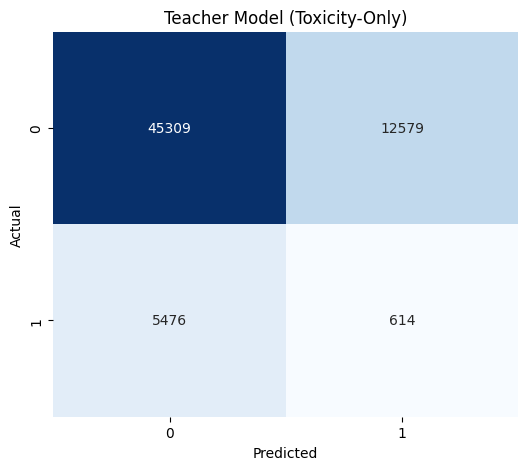

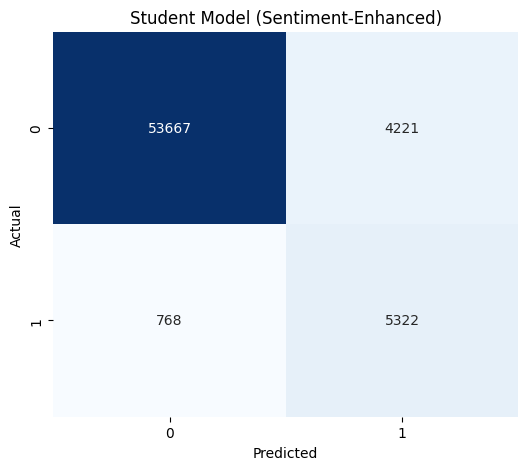

In [66]:
# Visualize

import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to plot confusion matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Teacher model confusion matrix
cm_teacher = confusion_matrix(filtered_test_df['toxic'], filtered_test_df['distilbert_output'])
plot_confusion_matrix(cm_teacher, "Teacher Model (Toxicity-Only)")

# Student model confusion matrix
cm_student = confusion_matrix(filtered_test_df['toxic'], filtered_test_df['student_output'])
plot_confusion_matrix(cm_student, "Student Model (Sentiment-Enhanced)")

In [67]:
# Analyze prediction errors by sentiment
filtered_test_df['error'] = filtered_test_df['toxic'] != filtered_test_df['student_output']
error_analysis = filtered_test_df.groupby(['sentiment_score', 'error']).size().unstack(fill_value=0)

print("Error Analysis by Sentiment Score:")
print(error_analysis)

Error Analysis by Sentiment Score:
error            False  True 
sentiment_score              
0                46382   4403
1                12607    586


##**Train Teacher Model: Roberta**
Teacher: Roberta

In [ ]:
from transformers import Trainer, TrainingArguments, AutoModelForSequenceClassification, AutoTokenizer
from datasets import Dataset
import torch
import pandas as pd

# Load train_data and validation_data (from earlier splits)
train_data = pd.read_csv('train_split.csv')  # Replace with your train split
validation_data = pd.read_csv('validation_split.csv')  # Replace with your validation split

# Rename the label column to "labels" (required by Hugging Face Trainer)
train_data = train_data.rename(columns={"toxic": "labels"})
validation_data = validation_data.rename(columns={"toxic": "labels"})

# Ensure labels are integers
train_data["labels"] = train_data["labels"].astype(int)
validation_data["labels"] = validation_data["labels"].astype(int)

# Convert to Hugging Face Dataset format
train_dataset = Dataset.from_pandas(train_data)
eval_dataset = Dataset.from_pandas(validation_data)

# Load the teacher model (e.g., RoBERTa)
teacher_model_name = "roberta-base"
teacher_model = AutoModelForSequenceClassification.from_pretrained(teacher_model_name, num_labels=2).to("cuda")
tokenizer = AutoTokenizer.from_pretrained(teacher_model_name)

# Tokenize datasets
def preprocess_function(examples):
    return tokenizer(examples['comment_text'], padding="max_length", truncation=True)

train_dataset = train_dataset.map(preprocess_function, batched=True)
eval_dataset = eval_dataset.map(preprocess_function, batched=True)

# Remove unused columns (only keep input_ids, attention_mask, and labels)
train_dataset = train_dataset.remove_columns(['id', 'comment_text'])
eval_dataset = eval_dataset.remove_columns(['id', 'comment_text'])

# Define training arguments
training_args = TrainingArguments(
    output_dir="./teacher_model",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    save_strategy="epoch",
    logging_dir="./logs"
)

# Fine-tune the teacher model
trainer = Trainer(
    model=teacher_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset
)

# Print memory usage
if torch.cuda.is_available():
    print(f"Memory allocated before training: {torch.cuda.memory_allocated() / 1e6:.2f} MB")

# Start training
trainer.train()

# Print memory usage after training
if torch.cuda.is_available():
    print(f"Memory allocated after training: {torch.cuda.memory_allocated() / 1e6:.2f} MB")

# Save the model
teacher_model.save_pretrained("./teacher_model")
tokenizer.save_pretrained("./teacher_model")

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Map:   0%|          | 0/127656 [00:00<?, ? examples/s]

Map:   0%|          | 0/31915 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Memory allocated before training: 1008.96 MB


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,0.107400,0.099971


Epoch,Training Loss,Validation Loss
1,0.107400,0.099971
2,0.078000,0.098912
3,0.054100,0.136658


Memory allocated after training: 2017.24 MB


('./teacher_model/tokenizer_config.json',
 './teacher_model/special_tokens_map.json',
 './teacher_model/vocab.json',
 './teacher_model/merges.txt',
 './teacher_model/added_tokens.json',
 './teacher_model/tokenizer.json')

In [ ]:
# Reloading comment_text into data

# Reload train_data to include comment_text
train_data = pd.read_csv('train_split.csv')
# Generate soft labels (predicted probabilities) for the student model
def generate_soft_labels(batch):
    teacher_model.eval()  # Put teacher model in evaluation mode
    inputs = tokenizer(batch['comment_text'], return_tensors="pt", padding=True, truncation=True).to("cuda")
    with torch.no_grad():
        logits = teacher_model(**inputs).logits
    soft_labels = torch.softmax(logits, dim=-1).cpu().numpy()
    return {"soft_labels": soft_labels}

# Convert to Hugging Face Dataset and add soft labels
train_dataset = Dataset.from_pandas(train_data)
train_dataset_with_soft_labels = train_dataset.map(
    generate_soft_labels,
    batched=True,
    batch_size=32  # Adjust based on memory
)

Map:   0%|          | 0/127656 [00:00<?, ? examples/s]

In [ ]:
print(train_data.columns)

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')


## **Train the Student Model Using Distillation**
Student: DistilBert

In [ ]:
from torch.nn import functional as F
from torch.utils.data import DataLoader
from transformers import AdamW, AutoModelForSequenceClassification

# Load the student model
student_model_name = "distilbert-base-uncased"
student_model = AutoModelForSequenceClassification.from_pretrained(student_model_name, num_labels=2).to("cuda")

# Define distillation loss
def distillation_loss(student_logits, teacher_probs, temperature=2.0):
    student_probs = F.log_softmax(student_logits / temperature, dim=1)
    teacher_probs = torch.softmax(teacher_probs / temperature, dim=1)
    return F.kl_div(student_probs, teacher_probs, reduction="batchmean") * (temperature ** 2)

# Prepare DataLoader
train_dataloader = DataLoader(
    train_dataset_with_soft_labels,  # Use dataset with soft labels
    batch_size=16,
    shuffle=True  # Shuffle for better training performance
)

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
for batch in train_dataloader:
    print(batch['soft_labels'])
    break


[tensor([9.9994e-01, 9.7947e-03, 9.9994e-01, 9.9994e-01, 9.9994e-01, 9.9994e-01,
        6.9090e-04, 1.0265e-02, 9.9994e-01, 9.9994e-01, 9.9994e-01, 9.9994e-01,
        9.9994e-01, 9.9994e-01, 9.9994e-01, 9.9991e-01], dtype=torch.float64), tensor([6.0621e-05, 9.9021e-01, 5.9719e-05, 5.9689e-05, 6.0862e-05, 6.0273e-05,
        9.9931e-01, 9.8974e-01, 6.0177e-05, 6.1548e-05, 5.9957e-05, 6.0288e-05,
        5.9750e-05, 5.9988e-05, 6.0047e-05, 8.8960e-05], dtype=torch.float64)]


In [ ]:
def generate_soft_labels(batch):
    teacher_model.eval()
    inputs = tokenizer(batch['comment_text'], return_tensors="pt", padding=True, truncation=True).to("cuda")
    with torch.no_grad():
        logits = teacher_model(**inputs).logits
    # Return soft labels as a list of lists (not tensors)
    return {"soft_labels": torch.softmax(logits, dim=-1).cpu().tolist()}

**Compare performance**

In [ ]:
from sklearn.metrics import classification_report

# Function to evaluate the model
def evaluate_model(model, dataset):
    model.eval()
    predictions, labels = [], []
    for example in dataset:
        if torch.cuda.is_available():
            print(f"Memory allocated before evaluation: {torch.cuda.memory_allocated() / 1e6:.2f} MB")
        inputs = tokenizer(example['comment_text'], return_tensors="pt", padding=True, truncation=True).to("cuda")
        with torch.no_grad():
            logits = model(**inputs).logits
        predictions.append(torch.argmax(logits, dim=1).cpu().numpy()[0])
        labels.append(example['toxic'])
        if torch.cuda.is_available():
            print(f"Memory allocated after evaluation: {torch.cuda.memory_allocated() / 1e6:.2f} MB")
    return predictions, labels

# Evaluate Teacher Model
teacher_preds, true_labels = evaluate_model(teacher_model, eval_dataset)
print("Teacher Model Performance:")
print(classification_report(true_labels, teacher_preds))

# Evaluate Student Model
student_preds, _ = evaluate_model(student_model, eval_dataset)
print("Student Model Performance:")
print(classification_report(true_labels, student_preds))

## **Roberta_toxicity_classifier author credits:**

In [ ]:
# Roberta_toxicity_classifier: https://huggingface.co/s-nlp/roberta_toxicity_classifier
# Use a pipeline as a high-level helper.

from transformers import pipeline

pipe = pipeline("text-classification", model="s-nlp/roberta_toxicity_classifier")

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from transformers import logging
logging.set_verbosity_error()

tokenizer = RobertaTokenizer.from_pretrained('s-nlp/roberta_toxicity_classifier')
model = RobertaForSequenceClassification.from_pretrained('s-nlp/roberta_toxicity_classifier')

batch = tokenizer.encode("You are amazing!", return_tensors="pt")

output = model(batch)
# idx 0 for neutral, idx 1 for toxic
# @inproceedings{logacheva-etal-2022-paradetox,
#     title = "{P}ara{D}etox: Detoxification with Parallel Data",
#     author = "Logacheva, Varvara  and
#       Dementieva, Daryna  and
#       Ustyantsev, Sergey  and
#       Moskovskiy, Daniil  and
#       Dale, David  and
#       Krotova, Irina  and
#       Semenov, Nikita  and
#       Panchenko, Alexander",
#     booktitle = "Proceedings of the 60th Annual Meeting of the Association for Computational Linguistics (Volume 1: Long Papers)",
#     month = may,
#     year = "2022",
#     address = "Dublin, Ireland",
#     publisher = "Association for Computational Linguistics",
#     url = "https://aclanthology.org/2022.acl-long.469",
#     pages = "6804--6818",
#     abstract = "We present a novel pipeline for the collection of parallel data for the detoxification task. We collect non-toxic paraphrases for over 10,000 English toxic sentences. We also show that this pipeline can be used to distill a large existing corpus of paraphrases to get toxic-neutral sentence pairs. We release two parallel corpora which can be used for the training of detoxification models. To the best of our knowledge, these are the first parallel datasets for this task.We describe our pipeline in detail to make it fast to set up for a new language or domain, thus contributing to faster and easier development of new parallel resources.We train several detoxification models on the collected data and compare them with several baselines and state-of-the-art unsupervised approaches. We conduct both automatic and manual evaluations. All models trained on parallel data outperform the state-of-the-art unsupervised models by a large margin. This suggests that our novel datasets can boost the performance of detoxification systems.",
# }
